# BIKE SHARING ASSIGNMENT (MULTIPLE LINEAR REGRESSION)

PROBLEM STATMENT :

Boombike, a bike sharing company has faced losses in revenue due to Covid Pandemic.The company wants to plan to spike up their revenue after Covid stabalizes.Their Aim is to plan to carter people's demand post the pandamic and stand out from other service providers and make profit. 

WHAT COMPANY WANTS:
    
- Which variables are significant in predicting the demand for shared bikes
- How well the variables above describe he bike demands.

# Import Libraries

In [1]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Import all the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Data Understanding and Loading

In [2]:
# Read the csv file

bikesharing_df = pd.read_csv("day.csv")

In [3]:
#Explore the data
#In order to understand the data completly we will refer to the Data dictonary provided.
#https://cdn.upgrad.com/uploads/production/0fdfa494-a9bf-4b32-873f-900e3b262948/Readme.txt

bikesharing_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [4]:
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bikesharing_df.shape

(730, 16)

HANDLE MISSING VALUES

In [6]:
bikesharing_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 From the above analysis we can conclude that:
 - The dataset has 730 rows and 16 columns
 - There are no Null/ Missing values in the dataset 
 - Some are categorical columns however referred as int/float
 

# EDA

DROPING UNWANTED COLUMNS

In [7]:
# On going through the dataset we see that the columns "Casual" and "Registered" can be dropped.
# Reason: They are not features.They imply if the user is registered/ casual. 
# We have "cnt" column that gives total rented bikes that we can use for analysis.

bikesharing_df.drop(['casual'], axis = 1, inplace = True)
bikesharing_df.drop(['registered'], axis = 1, inplace = True)

In [8]:
# Also columns "instant" and "dteday" can be dropped
# "Instant" is the index column for the dataset which is not required for analysis
# "dteday" is the date. We can drop this because we already have month year and weekday columns available for analysis.

bikesharing_df.drop(['instant'], axis = 1, inplace = True)
bikesharing_df.drop(['dteday'], axis = 1, inplace = True)

In [9]:
bikesharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


CONVERT MONTH,WEEKDAY, SEASON and WEATHERSIT TO CATEGORICAL VARIABLES

In [10]:
bikesharing_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikesharing_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikesharing_df.mnth = bikesharing_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikesharing_df.weekday = bikesharing_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})


In [11]:
# This step is done to make the EDA easier

In [12]:
bikesharing_df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,jan,0,sat,0,good,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,jan,0,sun,0,moderate,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,jan,0,mon,1,moderate,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,jan,0,tue,1,good,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,jan,0,wed,1,good,6.184153,7.54440,48.2917,14.958889,1321


VISULAISATION OF DATA

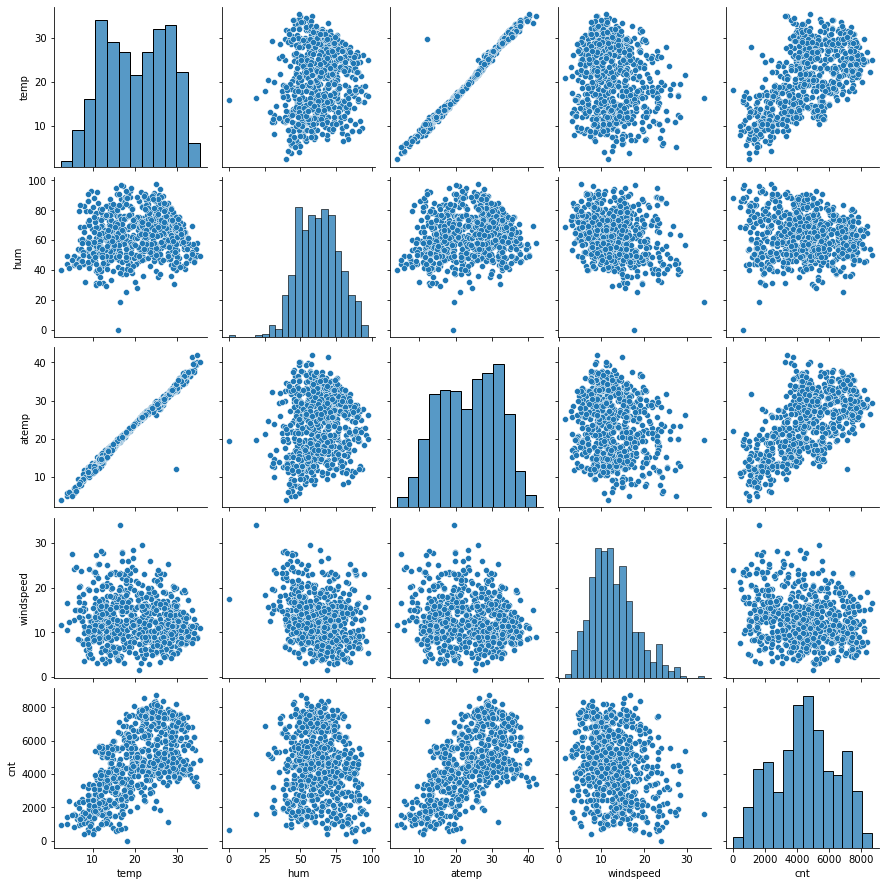

In [13]:
# Visualisation of Numeric Variables

# We will create a pairplot


sns.pairplot(bikesharing_df, vars=['temp','hum','atemp','windspeed',"cnt"])
plt.show()


From the above we can conclude that 
- "temp" and "atemp" variables are correlated with each other
- "temp" and "atemp" looks to have high corelation with Target variable "cnt" 

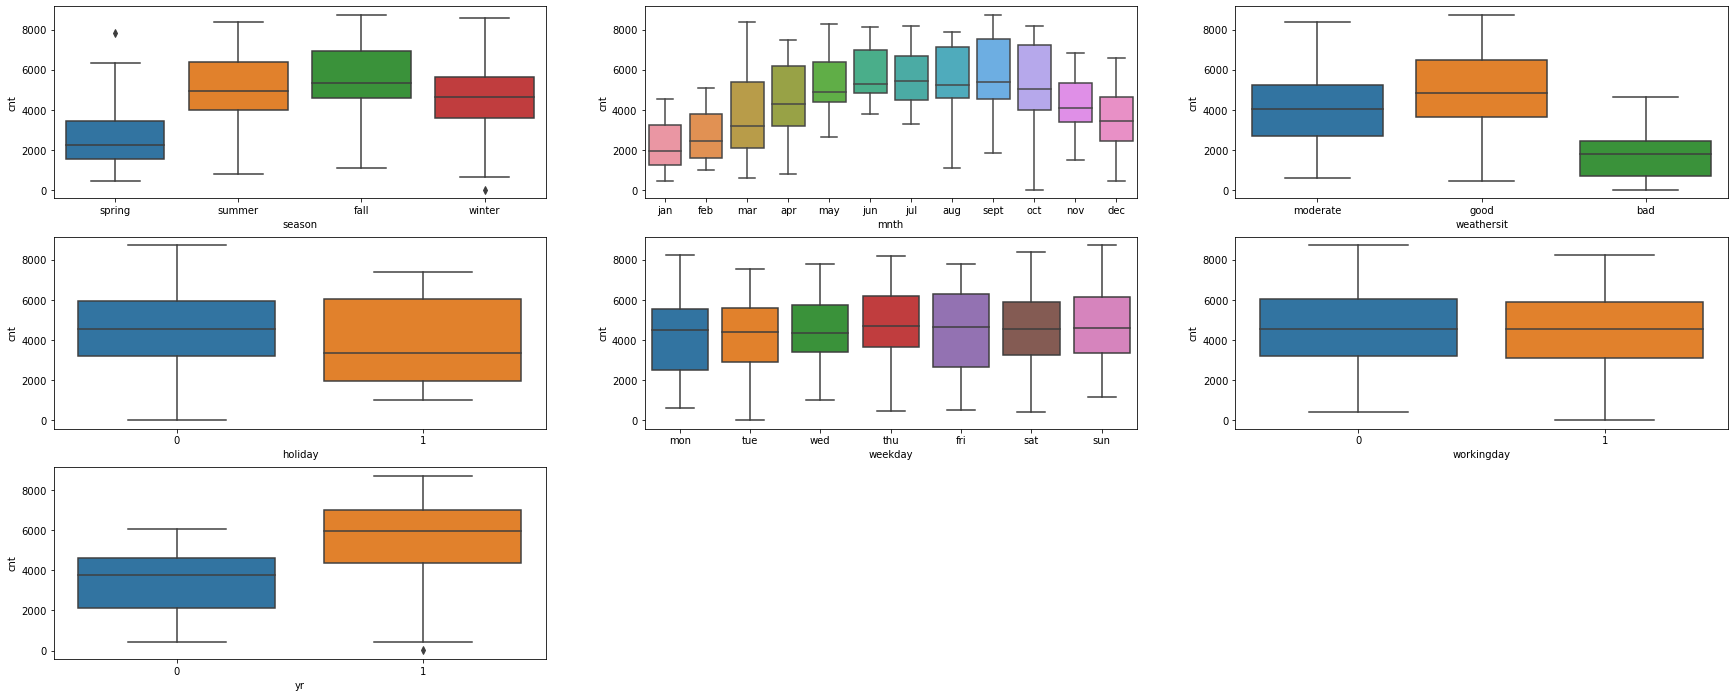

In [14]:
# Visualisation of Categorical variables

# We will create Boxplot

plt.figure(figsize=(30, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing_df)
plt.show()

From the above analysis we conclude that:
- season : Most of the Bike bookings happened in "Summer"(Season 2) and "Fall"(Season 3). Season can be a good predictor for Target variable 
- month  : Most of the Bike bookings happened from the month of "apr" till "oct". Demand seemes to continuously grow till almost "jun". "mnth" can be a good predictor for Target variable.
- weathersit :Most of the bike booking happened in weathersit 2 (good). Hence can be a good predictor for Target variable.
- holiday: Most bike bookings happened in "not a holiday" (0). cannot be considered as a good predictor.When there is holiday demand seems to have decreesed.
- weekeday: all days seems to have almost same trend with respect to bike booking.It cannot be a good predictor for target varaiable.
- workingday: doesnt seem to have much influence. Both 0 and 1 have same trend with respect to the booking.
- yr: the year 2019 clearly shows more bookings than year 2018.

CORRELATION METRIX

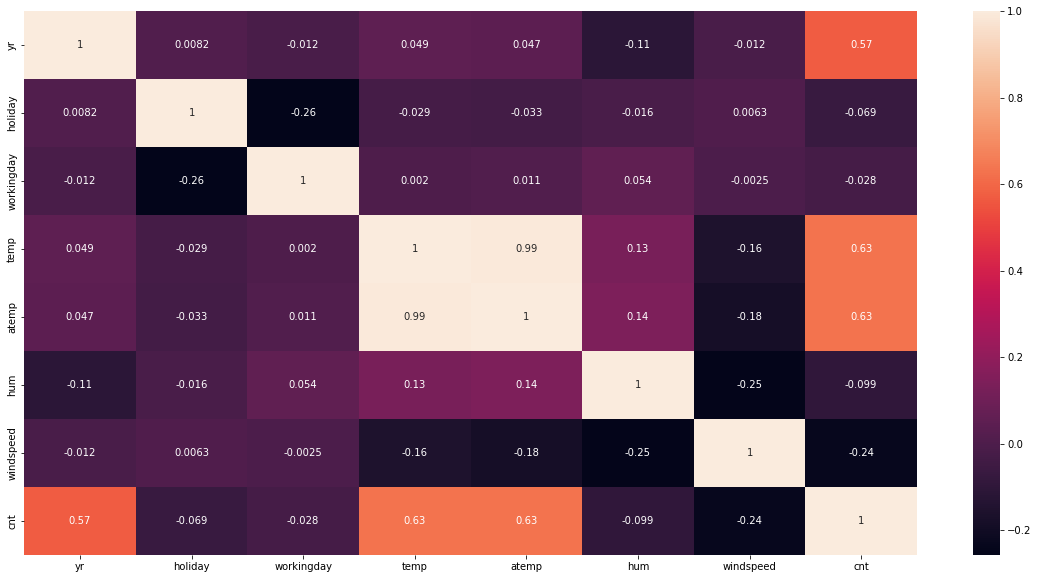

In [15]:
corr = bikesharing_df.corr()
plt.figure(figsize=(20,10))

# Heatmap of correlation
sns.heatmap(corr,annot=True )
plt.show()

From the above :
- There is a correlation of 0.63 between cnt-temp and cnt-atemp
- There is a correlation of 0.99 between temp and atemp



# DATA PREPARATION

CREATE DUMMY VARIABLES FOR ALL CATEGORICAL VARIABLES

In [16]:
bikesharing_df = pd.get_dummies(data=bikesharing_df,columns=["season","mnth","weekday"],drop_first=True)
bikesharing_df = pd.get_dummies(data=bikesharing_df,columns=["weathersit"])

In [17]:
bikesharing_df.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [18]:
# We have successfully created dummy variables


In [19]:
bikesharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


# MODEL BUILDING

SPLIT DATASET INTO TRAIN TEST SETS

In [20]:
# y contains Target Variable
y=bikesharing_df.pop('cnt')

# Contains all independant variables
X=bikesharing_df

# Train-Test split 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)


In [21]:
X.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
# Lets check if the split worked

print(X_train.shape)
print(X_test.shape)

(510, 30)
(220, 30)


In [23]:
# The split is sucessful

FEATURE SCALING OF CONTINUOUS VARIABLES

In [24]:
# Lets scale continuous variables

num_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

# BUILDING MODEL USING RFE AND AUTOMATED APPROACH

In [25]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

MANUAL ELIMINATION

In [27]:
# Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [28]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [29]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [30]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [31]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [32]:
X_train_rfe.shape


(510, 15)

# BUILD MODEL

# MODEL 1 

In [33]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.8
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.67e-188
Time:                        17:04:15   Log-Likelihood:                -4112.3
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     494   BIC:                             8324.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2730.3983    

# MODEL 2

In [34]:
# Dropping the variable "mnth_jan" as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.4
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          6.85e-189
Time:                        17:04:15   Log-Likelihood:                -4114.2
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     495   BIC:                             8322.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2632.4781    

# MODEL 3

In [35]:
# Dropping the variable "workingday" as it has negative coefficient and is insignificant as it has high p-value


cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.6
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          2.93e-189
Time:                        17:04:15   Log-Likelihood:                -4116.1
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     496   BIC:                             8319.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2480.9273    

# MODEL 4

In [36]:
# dropping "hum" due to high VIF value

cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.6
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          4.25e-186
Time:                        17:04:15   Log-Likelihood:                -4126.4
No. Observations:                 510   AIC:                             8279.
Df Residuals:                     497   BIC:                             8334.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1744.0770    

# MODEL 5

In [37]:
# Dropping "weekday_sat" as it has negative coefficient and is insignificant as it has high p-value

cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          5.06e-187
Time:                        17:04:15   Log-Likelihood:                -4127.0
No. Observations:                 510   AIC:                             8278.
Df Residuals:                     498   BIC:                             8329.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1755.4766    

From the above:
- VIF seems to be good and p-value is almost 0 for all the features
- Model 5 can be selected
- Difference between R-squared and Adjusted R-squared is very less
- F-static is also large, stating a good fit of model

In [38]:
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [39]:
#Let us build the finalmodel using sklearn
cols1 = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']

#Build a model with above columns
lr = build_model_sk(X_train[cols1],y_train)
print(lr.intercept_,lr.coef_)

1755.4766423305236 [ 2030.19238442  -847.14928165  4267.66544791 -1285.71096412
  -583.83299346   404.06848335   710.49689072  -452.48043277
   667.9478902  -2470.2587189   -696.80790752]


# MODEL EVALUATION

RESIDUAL ANALYSIS

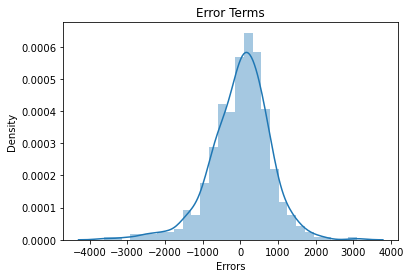

In [40]:
y_train_pred = lr.predict(X_train[cols])


#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

plot_res_dist(y_train, y_train_pred)


From the above:
- Errors are normally distributed with mean 0
- Good to go


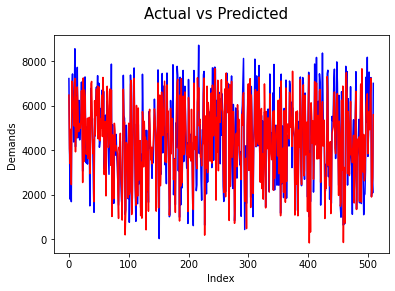

In [41]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Actual and Predicted result following almost the same pattern so this model is good to go


In [42]:
#Print R-squared Value

r2_score(y_train,y_train_pred)


0.835281973840364

LINEARITY CHECK

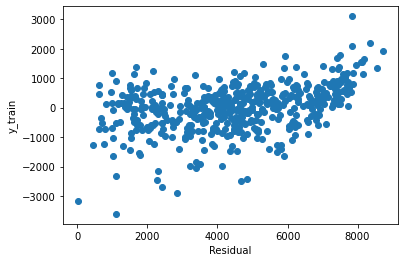

In [43]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

 PREDICTION ON TEST DATASET

In [44]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [45]:
#Columns from our final model
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

In [46]:
#  R squared value between test and predicted test data sets.  

r2_score(y_test,y_test_pred)



0.8052680349048545

HOMOSCEDACITY
- R2 value for predictions on test data (0.805) is almost same as R2 value of train data(0.835). 
- This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

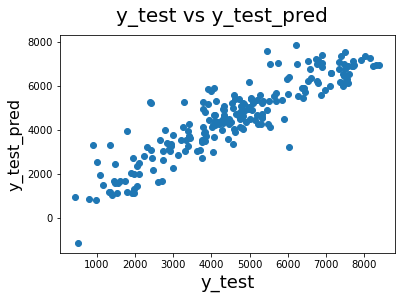

In [47]:
#Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

In [48]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

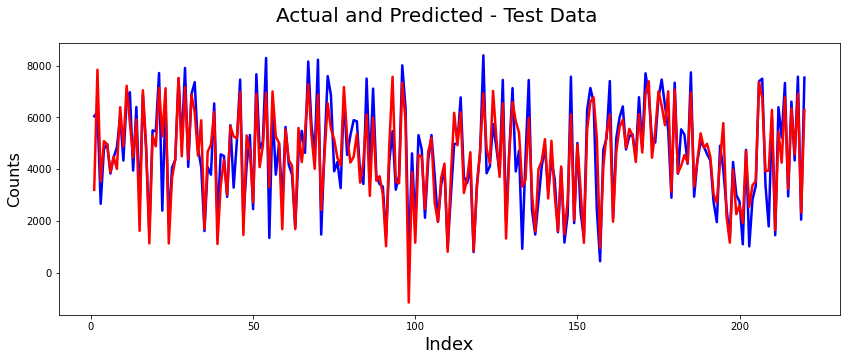

In [49]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

Predictions for test data is very close to actuals

# INTERPRETATION OF RESULTS

- Based on previous data it is expected to have a good increese in number of users once situation comes back to normal, compared to 2019
- There would be less bookings during bad weather conditions, the company can utilize this time to serive the bikes and plan to increese bookings in normal weather condition such as summer and spring.
- September is a promising month to plan to expand business as most number of bookings come in this month